In [36]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
DATASET = "amazon_reviews_us_Grocery_v1_00.tsv"
import matplotlib.pyplot as plt

### Supervised Learning 

*Getting the Data*

- Problem: no labels, 2 millions rows, sparse (fewer negative reviews than positive)
- Solution: Exploit **sparsity**. Filter dataset into a reasonably sized subset with a heuristic to get all negative reviews while allowing room for false positives. Manually annotate the subset and assume all other reviews outside the subset are positive reviews 
- Label 0.1% of the data and get 99.9% labelled free!

___________________________________________


*Parsing*

- Problem: Supervised models cannot understand text
- Solution: Convert reach review into a **vector** with **tf-idf**.



- Problem: Vectors are too big! Uses up too much computational time  
- Solution: Optimize vectors by removing **stopwords**, use **lemmatization**. 

_________________________________________________________________

*Evaluation*

- Problem: How to determine best model? How to determine best feature? How to determine best parameters for the best model? 
- Solution: Compare model **accuracy/confusion matrix**, experiment with different features, use **grid-search** to determine best parameters 


In [37]:

from os import walk
from functools import reduce


def read_dataset():
    _, _, filenames = next(walk("labelled_dataset"))
    dfs = []
    for f in filenames:
        df = pd.read_csv(f"labelled_dataset/{f}")
        dfs.append(df)
        
    return pd.concat(dfs)

In [98]:
labelled_df = read_dataset()
original_df = pd.read_table(DATASET, error_bad_lines=False, header=0, warn_bad_lines=False) 


/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Building the dataset

- TF-IDF
- Lemmatization



In [158]:
def get_entries_outside_labelled_dataset(labelled_df,n):
    random_samples = original_df.sample(n)
    random_samples["food_safety_flag"] = "0" 
    return pd.concat([random_samples, labelled_df]).drop_duplicates().reset_index(drop=True)

def build_dataset(orig_df, review_feature, meta_features, label_feature):
    df = get_entries_outside_labelled_dataset(orig_df.copy(), 1000)
    df.reset_index(inplace=True, drop=True)
    v = TfidfVectorizer()
    x = v.fit_transform(df[review_feature])
    tfidf_dataset = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
    meta_feature_dataset = df[meta_features]
    print(len(df[df[label_feature]==1]))
    r = [0  for label in df[label_feature] if label ==1]
    return pd.concat([meta_feature_dataset, tfidf_dataset],axis=1), [1 if label ==1 else 0 for label in df[label_feature]]



In [159]:

X, y = build_dataset(labelled_df.copy(), "review_body", ["star_rating"], "food_safety_flag" )


462
1523
399
----------
399
399 rr
1523
wut
399


In [140]:
f = get_entries_outside_labelled_dataset(labelled_df, 20)
print(len(f))

523
543


In [7]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [190]:
sgd = SGDClassifier(
    max_iter            = 1000, 
    tol                 = 1e-3,
    validation_fraction = 0.2,
   # class_weight = {0:0.2, 1:9.99}
)

In [193]:

 from sklearn.metrics import precision_recall_fscore_support
def evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    arr = precision_recall_fscore_support(y_test, y_pred)
    print(arr)
    print('\n Accuracy: ', accuracy_score(y_test, y_pred))
    print('\nClassification Report')
    print('======================================================')
    print('\n', report)

    plot_confusion_matrix(clf, X_test, y_test, display_labels=["Non Faulty", "Faulty"])  

(array([0.91435185, 0.69662921]), array([0.87973274, 0.77018634]), array([0.89670829, 0.73156342]), array([449, 161]))

 Accuracy:  0.8508196721311475

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.88      0.90       449
           1       0.70      0.77      0.73       161

    accuracy                           0.85       610
   macro avg       0.81      0.82      0.81       610
weighted avg       0.86      0.85      0.85       610



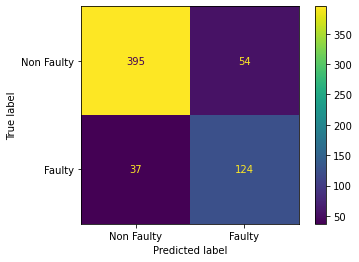

In [196]:
evaluate(sgd, X_train, X_test, y_train, y_test,)


In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [13]:
from sklearn.metrics import plot_precision_recall_curve

In [14]:
len(thresholds)

752

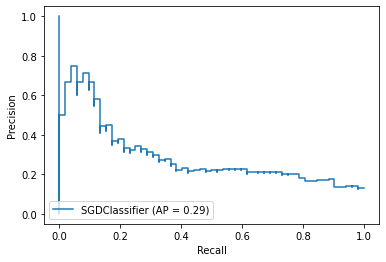

In [15]:
disp = plot_precision_recall_curve(sgd, X_test, y_test)

In [161]:
sum((i for i in y_test if i==1))

161

In [97]:
sum((i for i in y if i==1))

120

In [95]:
len(labelled_df[labelled_df["food_safety_flag"]==1])

462

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
